In [2]:
!nvidia-smi;

import numpy as np
import os
import numpy.random as random
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models


from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.layers import GaussianNoise, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
K = tensorflow.keras.backend
from umap import UMAP

import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%load_ext autoreload
%autoreload 2
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
import os 

import h5py 
import matplotlib.pyplot as plt
import numpy as np
import glob
from scipy.ndimage import median_filter
import time
%matplotlib notebook
import pandas as pd
from numpy import save

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
dropdatacentered = np.load('dropdatacentered.npy')

In [3]:
eh5 = np.load('diego_mocap_files_rat_JDM31_day_13_interpolate_centered.npy')

In [4]:
variational_ae = tf.keras.models.load_model('saved_model/four_layer_8')
print("Generate predictions for Interpolate centered data")
predictedX_eh5 = variational_ae.predict(eh5)
#save('predicted_dropped_eh5.npy', predicteddropeh5_sample)

from scipy import stats
stats.describe(np.linalg.norm(sample.reshape((-1,19,3))-predictedX_eh5.reshape((-1,19,3)), axis=2), axis=0)

Generate predictions for Interpolate centered data


NameError: name 'sample' is not defined

In [6]:
badX = np.where(np.any(np.linalg.norm(eh5.reshape((-1,19,3))-predictedX_eh5.reshape((-1,19,3)), axis=2) >= 20, axis=1)) #was 48
goodX = np.setdiff1d(np.arange(eh5.shape[0]), badX)
badXX = np.setdiff1d(np.arange(eh5.shape[0]), goodX)
eh5_good = eh5[goodX,]
eh5_bad = eh5[badXX,]
print('Shape of X = '+str(np.shape(eh5))+'\n')
print('Shape of good X = '+str(np.shape(eh5_good))+'\n')
print('Shape of bad X = '+str(np.shape(eh5_bad))+'\n')

Shape of X = (19980000, 57)

Shape of good X = (14970175, 57)

Shape of bad X = (5009825, 57)



In [33]:
diff_sensor_origin = []
for i in range(len(eh5)):
    diff_sensor = np.linalg.norm(eh5[i].reshape((-1,19,3))-predictedX_eh5[i].reshape((-1,19,3)), axis=2)[0]
    diff_sensor_origin.append(diff_sensor)
    

In [59]:
diff_sensor_origin[0]

array([229.8344734 , 179.29525788, 216.58947791, 178.11424427,
       187.9459483 , 184.11538872, 198.30209556, 196.15510573,
       156.02582645, 224.58700937, 167.26273848, 263.08962125,
       260.89445862, 186.16668168, 149.55084827, 244.90513265,
       227.17576097, 249.2005325 , 199.58843571])

In [52]:
def VAE_defined_errorcount(data, sensornumber):
    errorcount = 0
    for i in range(len(data)):
        if (data[i][sensornumber] > 20) == True:
            errorcount +=1
    return errorcount

In [53]:
VAE_Errorcount = [0]*19
for i in range(19):
    VAE_Errorcount[i] = VAE_defined_errorcount(diff_sensor_origin,i)

In [54]:
VAE_Errorcount

[3185604,
 3824291,
 3226373,
 4068713,
 2566747,
 2931320,
 2536853,
 2414063,
 2559906,
 1861493,
 2518181,
 2344078,
 1772806,
 2321938,
 2680858,
 2937669,
 3094998,
 2720405,
 1988256]

In [55]:
VAE_Errorcount_percentage = [0]*19

for i in range(19):
    VAE_Errorcount_percentage[i] = round(VAE_Errorcount[i]/len(eh5),3)

In [65]:
VAE_Errorcount_percentage

[0.159,
 0.191,
 0.161,
 0.204,
 0.128,
 0.147,
 0.127,
 0.121,
 0.128,
 0.093,
 0.126,
 0.117,
 0.089,
 0.116,
 0.134,
 0.147,
 0.155,
 0.136,
 0.1]

<IPython.core.display.Javascript object>


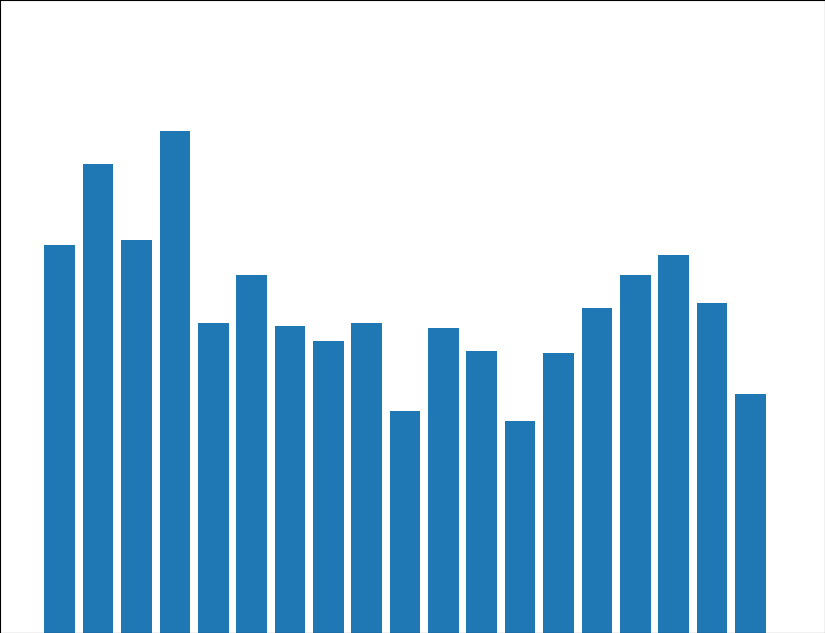

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sensor = ['ArmL', 'ArmR', 'ElbowL', 'ElbowR', 'HeadB', 'HeadF', 'HeadL', 'HipL', 'HipR', 'KneeL', 'KneeR', 'Offset2', 'Offset1', 'ShinL', 'ShinR', 'ShoulderL', 'ShoulderR', 'SpineF', 'SpineL']
ax.bar(Sensor,VAE_Errorcount_percentage)
ax.set_title("VAE Defined Errors per Sensor: Original Posture", fontsize = 16)
ax.set_xlabel('Sensor')
plt.xticks(rotation = 60)
ax.set_ylabel('Error Rate')
plt.show()
fig.savefig('VAE Defined Error per Sensors Original Posture.png', bbox_inches = "tight")

In [7]:
predictedX_eh5_2 = variational_ae.predict(predictedX_eh5)

In [9]:
badX = np.where(np.any(np.linalg.norm(predictedX_eh5_2.reshape((-1,19,3))-predictedX_eh5.reshape((-1,19,3)), axis=2) >= 20, axis=1)) #was 48
goodX = np.setdiff1d(np.arange(eh5.shape[0]), badX)
badXX = np.setdiff1d(np.arange(eh5.shape[0]), goodX)
eh5_good = eh5[goodX,]
eh5_bad = eh5[badXX,]
print('Shape of X = '+str(np.shape(eh5))+'\n')
print('Shape of good X = '+str(np.shape(eh5_good))+'\n')
print('Shape of bad X = '+str(np.shape(eh5_bad))+'\n')

Shape of X = (19980000, 57)

Shape of good X = (18489900, 57)

Shape of bad X = (1490100, 57)



In [57]:
diff_sensor_predicted = []
for i in range(len(eh5)):
    diff_sensor = np.linalg.norm(predictedX_eh5_2[i].reshape((-1,19,3))-predictedX_eh5[i].reshape((-1,19,3)), axis=2)[0]
    diff_sensor_predicted.append(diff_sensor)

In [58]:
diff_sensor_predicted[0]

array([ 9.595901 , 17.079544 , 10.693655 , 16.000937 ,  9.361174 ,
       20.062235 ,  8.603921 ,  2.401164 ,  3.5873504,  6.402073 ,
        3.1920683, 10.102676 ,  5.1359286,  6.33954  ,  0.772581 ,
       16.85201  , 11.175595 ,  9.507231 ,  3.5594206], dtype=float32)

In [60]:
VAE_predicted_Errorcount = [0]*19
for i in range(19):
    VAE_predicted_Errorcount[i] = VAE_defined_errorcount(diff_sensor_predicted,i)

In [61]:
VAE_predicted_Errorcount

[266688,
 603116,
 586265,
 540737,
 736466,
 917353,
 1065238,
 226666,
 74334,
 172307,
 29026,
 59738,
 371,
 497149,
 309792,
 421830,
 356099,
 175168,
 36137]

In [66]:
VAE_predicted_Errorcount_percentage = [0]*19

for i in range(19):
    VAE_predicted_Errorcount_percentage[i] = round(VAE_predicted_Errorcount[i]/len(eh5),3)

In [67]:
VAE_predicted_Errorcount_percentage

[0.013,
 0.03,
 0.029,
 0.027,
 0.037,
 0.046,
 0.053,
 0.011,
 0.004,
 0.009,
 0.001,
 0.003,
 0.0,
 0.025,
 0.016,
 0.021,
 0.018,
 0.009,
 0.002]

<IPython.core.display.Javascript object>


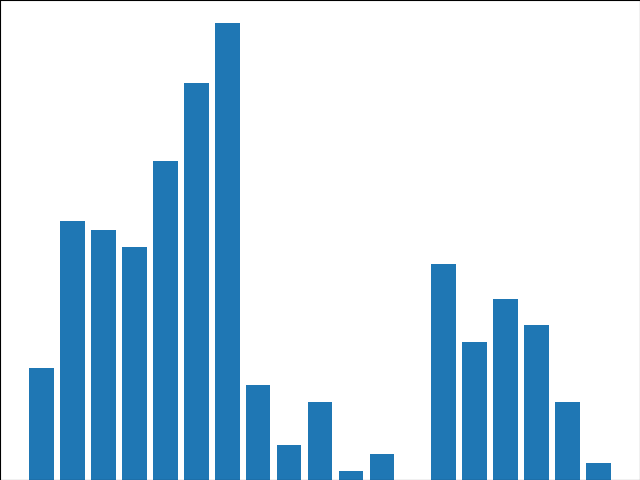

In [97]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Sensor = ['ArmL', 'ArmR', 'ElbowL', 'ElbowR', 'HeadB', 'HeadF', 'HeadL', 'HipL', 'HipR', 'KneeL', 'KneeR', 'Offset2', 'Offset1', 'ShinL', 'ShinR', 'ShoulderL', 'ShoulderR', 'SpineF', 'SpineL']
ax.bar(Sensor,VAE_predicted_Errorcount_percentage)
ax.set_title("VAE Defined Errors per Sensor: VAE Predicted Posture", fontsize = 16)
ax.set_xlabel('Sensor', fontsize = 12)
plt.xticks(rotation = 60)
ax.set_ylabel('Error Rate')
plt.show()
fig.savefig('VAE Defined Error per Sensors Predicted Posture.png', bbox_inches = "tight")

In [69]:
np.save('VAE_predicted_Errorcount.npy', VAE_predicted_Errorcount)
np.save('VAE_Errorcount.npy', VAE_Errorcount)

<IPython.core.display.Javascript object>


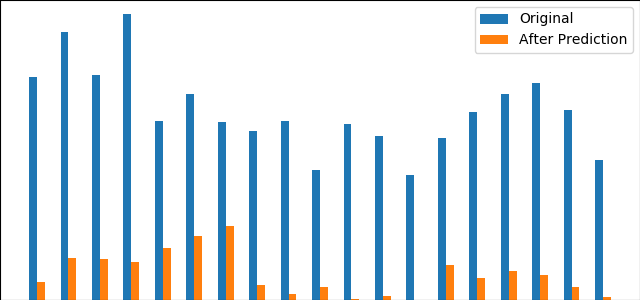

In [95]:
fig = plt.figure(figsize=(6.40,3))
ax = fig.add_axes([0,0,1,1])
Sensor = ['ArmL', 'ArmR', 'ElbowL', 'ElbowR', 'HeadB', 'HeadF', 'HeadL', 'HipL', 'HipR', 'KneeL', 'KneeR', 'Offset2', 'Offset1', 'ShinL', 'ShinR', 'ShoulderL', 'ShoulderR', 'SpineF', 'SpineL']
X = np.arange(19)
barWidth = 0.25
ax.bar(X + 0,VAE_Errorcount_percentage, width = 0.25, label ='Original')
ax.bar(X + barWidth,VAE_predicted_Errorcount_percentage, width = 0.25, label ='After Prediction')
ax.set_title("VAE Defined Errors per Sensor: Orginal vs After Prediction", fontsize = 16)


plt.xticks([r + barWidth for r in range(len(X))],
        Sensor)
plt.xticks(rotation = 60)
ax.set_xlabel('Sensor')
ax.set_ylabel('Error Rate')
plt.legend()
plt.show()
fig.savefig('VAE Defined Error per Sensors Changes.png', bbox_inches = "tight")

In [72]:
np.arange(19)

array([0, 1, 2, 3])

In [78]:
def nancount(data, sensornumber):
    nancount = 0
    for i in range(len(data)):
        if np.isnan(data[i][(3*(sensornumber))]):
            nancount +=1
    return nancount

In [80]:
nandata = np.load('diego_mocap_files_rat_JDM31_day_13_nan.npy')

In [79]:
sensornancount = [0]*20
for i in range(20):
    sensornancount[i] = nancount(nandata,i)

KeyboardInterrupt: 

In [ ]:
sensornancount_percentage = [0]*20

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]:
    sensornancount_percentage[i] = round(sensornancount[i]/len(eh5),3)

In [84]:
sensornancount_percentage=[0.1,
 0.089,
 0.05,
 0.039,
 0.03,
 0.046,
 0.039,
 0.002,
 0.016,
 0.008,
 0.008,
 0.047,
 0.003,
 0.029,
 0.047,
 0.062,
 0.093,
 0.123,
 0.07]

<IPython.core.display.Javascript object>


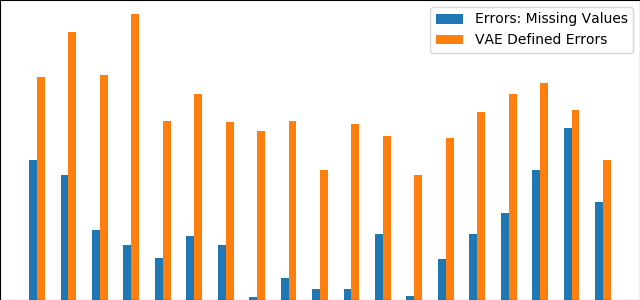

In [96]:
fig = plt.figure(figsize=(6.40,3.0))
ax = fig.add_axes([0,0,1,1])
Sensor = ['ArmL', 'ArmR', 'ElbowL', 'ElbowR', 'HeadB', 'HeadF', 'HeadL', 'HipL', 'HipR', 'KneeL', 'KneeR', 'Offset2', 'Offset1', 'ShinL', 'ShinR', 'ShoulderL', 'ShoulderR', 'SpineF', 'SpineL']
X = np.arange(19)
barWidth = 0.25
ax.bar(X + 0,sensornancount_percentage, width = 0.25, label ='Errors: Missing Values')
ax.bar(X + barWidth,VAE_Errorcount_percentage, width = 0.25, label ='VAE Defined Errors')
ax.set_title("Errors: Missing Values vs VAE Defined Errors", fontsize = 16)

plt.xticks([r + barWidth for r in range(len(X))],
        Sensor)
plt.xticks(rotation = 60)
ax.set_xlabel('Sensor')
ax.set_ylabel('Error Rate')
plt.legend()
plt.show()
fig.savefig('DIfferences in Errors Missing vs VAE.png', bbox_inches = "tight")